In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf

In [4]:
df = pd.read_excel('./datafiles/Concrete_Data.xls')
df.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [6]:
df.columns = ['cement', 'furnace', 'ash', 'water', 'superplasticizer', 'coarse', 'fine', 'age', 'strength']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   furnace           1030 non-null   float64
 2   ash               1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse            1030 non-null   float64
 6   fine              1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.head(3)

,cement,furnace,ash,water,superplasticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [9]:
# strengh를 예측하는 neural network moedl을 만들고 평가

In [10]:
x = df.drop('strength', axis=1)
y = df.strength

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
x_train_scaled.shape

(772, 8)

In [58]:
model = Sequential()
# input layer에서 차원을 맞춘다.
model.add(Dense(256, input_dim=8, activation='relu'))   # Dense : fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               2304      
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 45,569
Trainable params: 45,569
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
hist = model.fit(x_train_scaled,y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
62/62 [==============================] - 0s 2ms/step - loss: 720.7966 - val_loss: 207.7757
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 207.0355 - val_loss: 169.7920
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 171.3116 - val_loss: 154.8027
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 144.7875 - val_loss: 130.8843
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 126.7379 - val_loss: 145.2896
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 96.7617 - val_loss: 89.3834
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 78.0797 - val_loss: 81.8430
Epoch 8/100
62/62 [==============================] - 0s 1ms/step - loss: 64.1730 - val_loss: 74.4226
Epoch 9/100
62/62 [==============================] - 0s 1ms/step - loss: 55.8573 - val_loss: 58.8061
Epoch 10/100
62/62 [==============================] - 0s 1ms/step - loss: 45.2023

62/62 [==============================] - 0s 1ms/step - loss: 10.1708 - val_loss: 21.5518
Epoch 82/100
62/62 [==============================] - 0s 1ms/step - loss: 10.1486 - val_loss: 22.3780
Epoch 83/100
62/62 [==============================] - 0s 1ms/step - loss: 12.8429 - val_loss: 24.8547
Epoch 84/100
62/62 [==============================] - 0s 1ms/step - loss: 10.9139 - val_loss: 23.3945
Epoch 85/100
62/62 [==============================] - 0s 1ms/step - loss: 12.4995 - val_loss: 31.7574
Epoch 86/100
62/62 [==============================] - 0s 1ms/step - loss: 10.9827 - val_loss: 23.2927
Epoch 87/100
62/62 [==============================] - 0s 1ms/step - loss: 10.9219 - val_loss: 27.8994
Epoch 88/100
62/62 [==============================] - 0s 1ms/step - loss: 11.1054 - val_loss: 24.6007
Epoch 89/100
62/62 [==============================] - 0s 1ms/step - loss: 9.3505 - val_loss: 22.3147
Epoch 90/100
62/62 [==============================] - 0s 1ms/step - loss: 9.7430 - val_loss: 22.

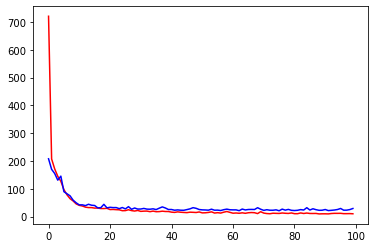

In [61]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')

In [62]:
model.evaluate(x_test_scaled, y_test)

9/9 [==============================] - 0s 873us/step - loss: 39.9653


39.965267181396484

In [63]:
preds = model.predict(x_test_scaled)

In [64]:
preds = [v[0] for v in preds]
preds

[51.16852,
 29.505749,
 30.399433,
 33.519314,
 56.694576,
 31.568281,
 16.305538,
 14.359035,
 20.646374,
 20.255587,
 33.186367,
 36.247665,
 35.578217,
 54.110332,
 45.47246,
 58.119392,
 36.596252,
 32.873528,
 32.88236,
 21.780651,
 20.375238,
 25.915852,
 20.547031,
 30.036842,
 38.305935,
 37.598362,
 22.347534,
 17.742313,
 59.08546,
 46.58654,
 55.828182,
 35.673794,
 42.212467,
 26.979641,
 30.978447,
 43.308823,
 43.658,
 38.175007,
 47.05712,
 30.131687,
 75.109215,
 40.768982,
 29.22644,
 40.303288,
 37.27796,
 29.621555,
 29.43976,
 23.777077,
 31.516964,
 24.06226,
 38.545433,
 44.805275,
 34.291126,
 32.59068,
 37.870663,
 45.626995,
 40.857143,
 39.14124,
 34.867092,
 31.429407,
 38.71149,
 12.923782,
 53.824978,
 34.8927,
 77.17484,
 22.959917,
 18.705626,
 51.803417,
 59.276028,
 82.12743,
 43.120434,
 49.488045,
 44.062283,
 47.03228,
 49.83058,
 26.478798,
 13.034558,
 65.45221,
 62.208763,
 50.151142,
 53.590984,
 37.124844,
 39.581936,
 41.743004,
 31.367634,
 72

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.8592056883185546

In [67]:
for i in zip(y_test, preds):
    print(i)

(47.739318239999996, 51.16852)
(30.44726016, 29.505749)
(42.29245784, 30.399433)
(32.922478999999996, 33.519314)
(65.909079268, 56.694576)
(26.22766704, 31.568281)
(20.96696516, 16.305538)
(10.53519328, 14.359035)
(23.221551679999997, 20.646374)
(13.395533715270679, 20.255587)
(33.05347944, 33.186367)
(42.79577532, 36.247665)
(36.44570136, 35.578217)
(52.82075636, 54.110332)
(37.34202016, 45.47246)
(62.935369279999996, 58.119392)
(33.72916592, 36.596252)
(29.7508894, 32.873528)
(24.40055564, 32.88236)
(24.44881896, 21.780651)
(20.08443588, 20.375238)
(32.039949719999996, 25.915852)
(18.287661424, 20.547031)
(34.23937816, 30.036842)
(49.20100736, 38.305935)
(50.60064364, 37.598362)
(21.917063088, 22.347534)
(15.091250688, 17.742313)
(64.30053176, 59.08546)
(41.934619796, 46.58654)
(68.29949256, 55.828182)
(39.056057496, 35.673794)
(44.38846488, 42.212467)
(33.398217439999996, 26.979641)
(30.2335226, 30.978447)
(34.73580088, 43.308823)
(33.5430074, 43.658)
(39.45181672, 38.175007)
(48.84